In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Analyse exploratoire des données

### 1.a Chargement des données par pandas

In [2]:
data = pd.read_csv("../datas/DataSet_Emails.csv")

### 1.b La structure générale du jeu de données

In [3]:
data.head()

,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


Dans ce jeu de données, on a 8 qui sont des colonnes et 31716 lignes.

- Suppression de colonne inutile

In [5]:
data.drop(columns={'Unnamed: 0', "message_id"}, axis=1, inplace=True)

### 1.c Identification des valeurs manquantes et doublons

In [6]:
data.isnull().sum()

text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

On voit qu'il y'a des valeurs manquantes dans les colonnes text, subject et message

In [7]:
data.duplicated().sum()

np.int64(2627)

On voit la presence de 2627 doublons

### 1.d Analiste de la distribution des variables

array([[<Axes: title={'center': 'label'}>]], dtype=object)

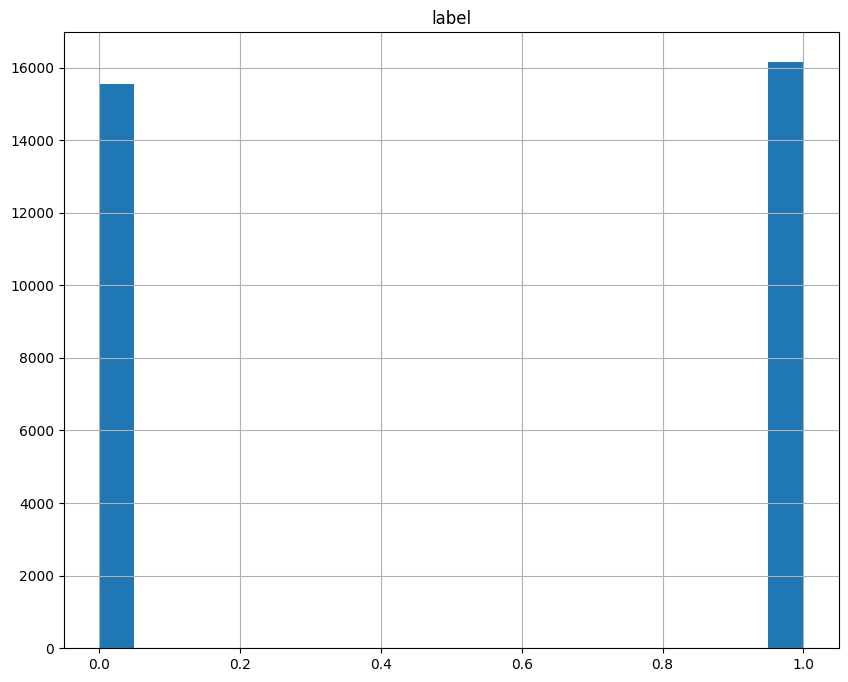

In [8]:
data[["label"]].hist(figsize=(10, 8), bins=20)

### 1.d Étude des relations entre variables à l’aide de matrices de corrélation

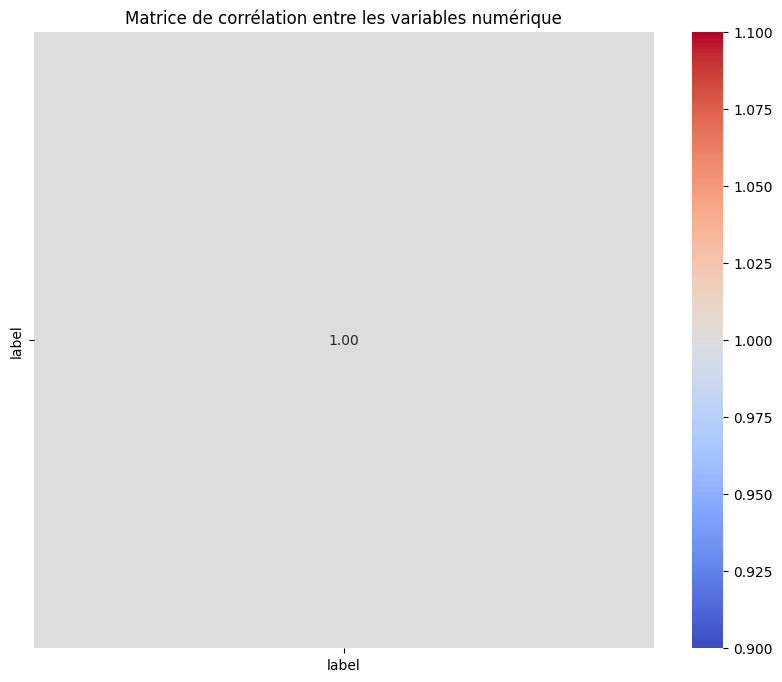

In [9]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables numérique")
plt.show()

### 1.c Creation d'un nuage pour les mots frequents dans les spams et un autre pour les emails légitimes

In [10]:
pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Longueur spam_text et ham_text: 21255214 26576448


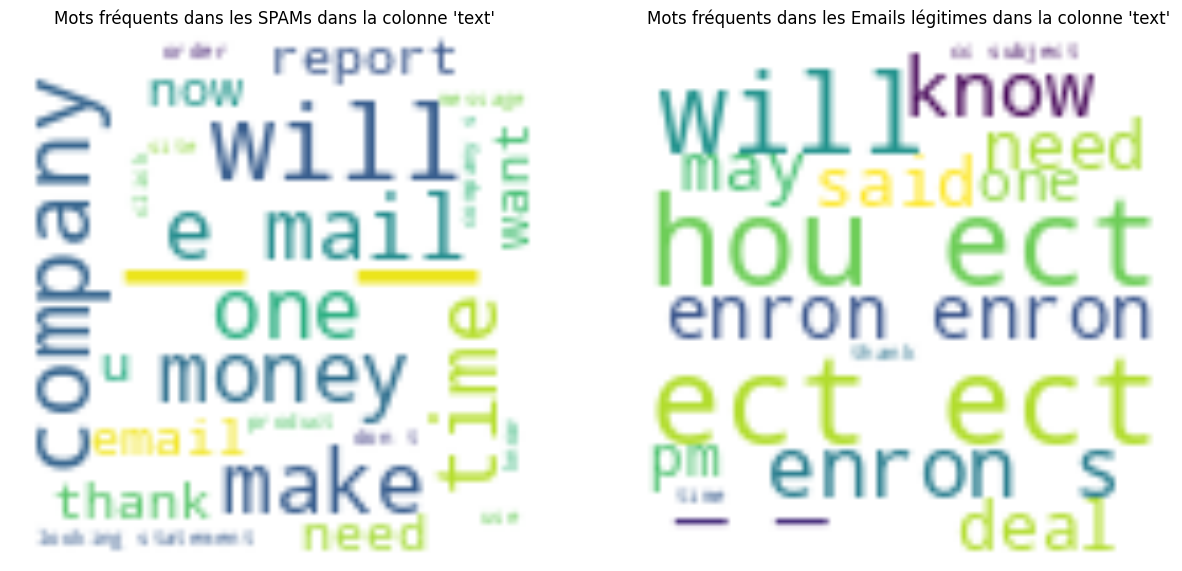

Longueur spam_text et ham_text: 628176 500752


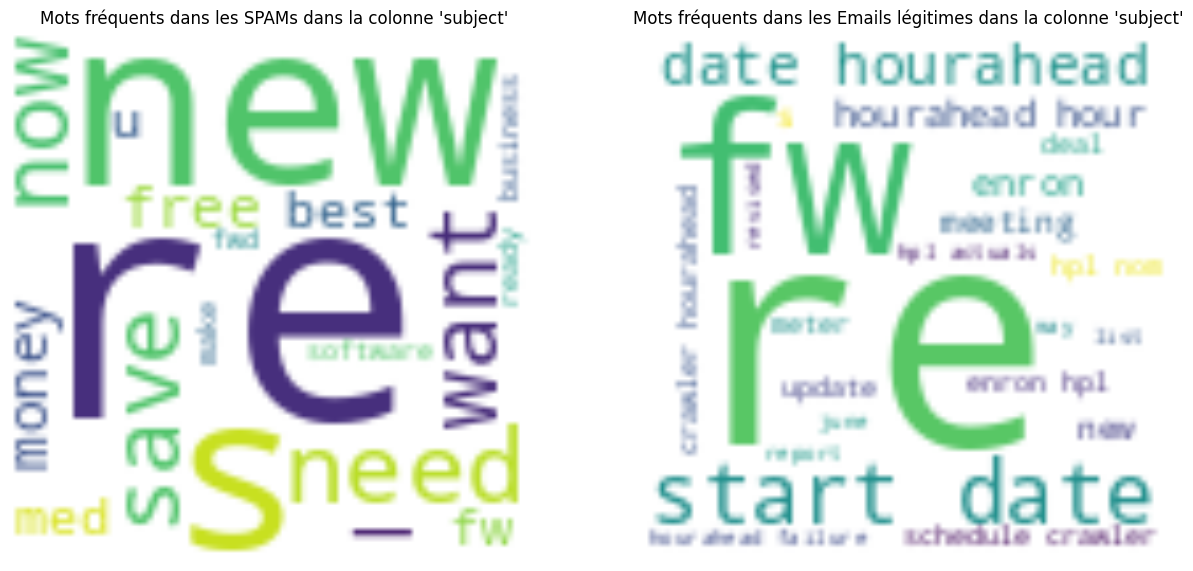

Longueur spam_text et ham_text: 20635635 26076123


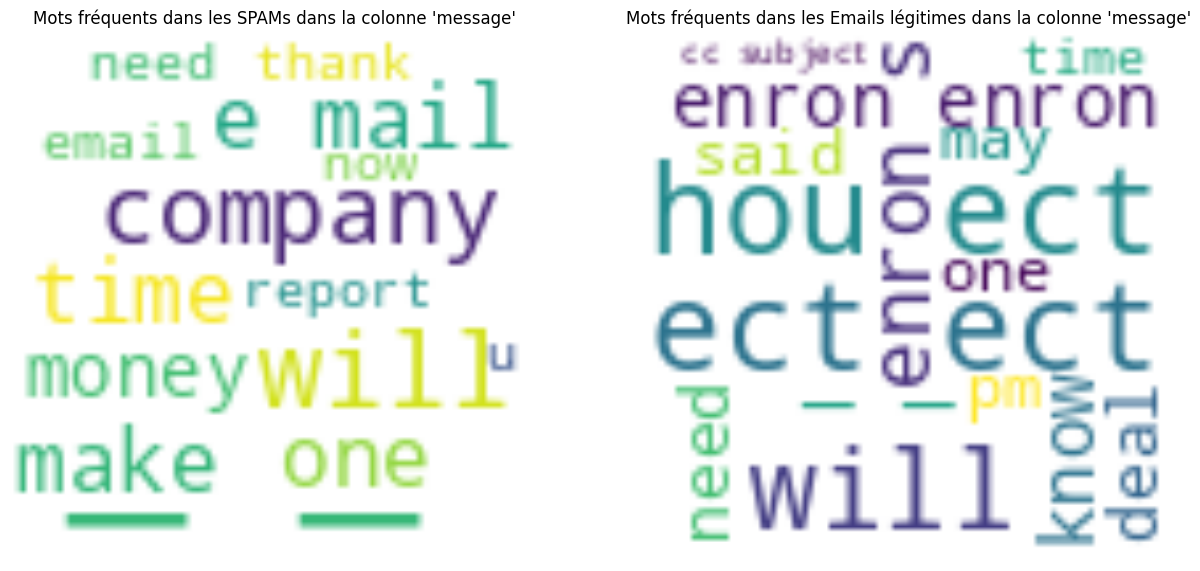

In [11]:
from wordcloud import WordCloud

for i in ['text', 'subject', 'message']:
    
    spam_text = " ".join(data[data["label_text"] == 'spam'][i].dropna().astype(str))
    ham_text = " ".join(data[data["label_text"] == 'ham'][i].dropna().astype(str))
    print("Longueur spam_text et ham_text:", len(spam_text), len(ham_text))
    
    spam_wordcloud = WordCloud(width=100, height=100, background_color="white").generate(spam_text)
    ham_wordcloud = WordCloud(width=100, height=100, background_color="white").generate(ham_text)
    
    fig, axes = plt.subplots(1, 2, figsize=(15,7))
    
    axes[0].imshow(spam_wordcloud, interpolation='bilinear')
    axes[0].set_title(f"Mots fréquents dans les SPAMs dans la colonne '{i}'")
    axes[0].axis("off")
    
    axes[1].imshow(ham_wordcloud, interpolation='bilinear')
    axes[1].set_title(f"Mots fréquents dans les Emails légitimes dans la colonne '{i}'")
    axes[1].axis("off")
    
    plt.show()

# 2. Prétraitement du texte

### 2.a Convertir tout le texte en minuscules : text.lower()

In [12]:
data["text"].dropna().astype(str).str.lower()

0        any software just for 15 $ - 99 $ understandin...
1        perspective on ferc regulatory action client c...
2        wanted to try ci 4 lis but thought it was way ...
3        enron / hpl actuals for december 11 , 2000 tec...
4        looking for cheap high - quality software ? ro...
                               ...                        
31711    credit netco start up plan louise ,\nattached ...
31712    everything you are looking for hello , visit o...
31713    start date : 2 / 5 / 02 ; hourahead hour : 18 ...
31714    corhshucker daren - - - -\nthe invoices are be...
31715    re : prosym license hi karolina ,\nthe last wo...
Name: text, Length: 31665, dtype: object

### 2.b Suppression des doublons

In [13]:
if data.duplicated().sum() > 0:
    data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [14]:
data.shape

(29089, 6)

### 2.c Identifions les valeurs manquantes et supprimer les lignes où la colonne text est vide ou manquante.

- Identification

In [15]:
data[data["text"].isnull()]

,text,label,label_text,subject,message,date
218,NaN,1,spam,NaN,NaN,2004-11-30
565,NaN,1,spam,NaN,NaN,2005-01-14
989,NaN,1,spam,NaN,NaN,2004-12-13
1716,NaN,1,spam,NaN,NaN,2004-08-13
3474,NaN,1,spam,NaN,NaN,2004-05-04
3743,NaN,1,spam,NaN,NaN,2005-02-07
5331,NaN,1,spam,NaN,NaN,2004-12-29
5997,NaN,1,spam,NaN,NaN,2004-06-10
6734,NaN,1,spam,NaN,NaN,2004-12-21
6963,NaN,1,spam,NaN,NaN,2004-12-20


In [16]:
data["text"].isnull().sum()

np.int64(43)

- Suppression

In [17]:
print(data["text"].isnull().sum() > 0)
if data["text"].isnull().sum() > 0:
    data.dropna(subset="text", inplace=True)
data['text'].isnull().sum()

True


np.int64(0)

### 2.d Appliquons la tokenisation : nltk.word_tokenize(text)

In [18]:
pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/meissagningue/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
from nltk import word_tokenize

tokens = []
for i in data.index:
    text = data.loc[i, "text"]
    tokens.append(word_tokenize(text))
data['text'] = tokens


In [21]:
data

,text,label,label_text,subject,message,date
0,"[any, software, just, for, 15, $, -, 99, $, un...",1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,"[perspective, on, ferc, regulatory, action, cl...",0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,"[wanted, to, try, ci, 4, lis, but, thought, it...",1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,"[enron, /, hpl, actuals, for, december, 11, ,,...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,"[looking, for, cheap, high, -, quality, softwa...",1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13
...,...,...,...,...,...,...
31710,"[re, :, var, meetings, in, houston, shirley, ,...",0,ham,re : var meetings in houston,"shirley ,\ndo you think we can get another roo...",2001-04-19
31711,"[credit, netco, start, up, plan, louise, ,, at...",0,ham,credit netco start up plan,"louise ,\nattached is the electronic version o...",2002-01-07
31712,"[everything, you, are, looking, for, hello, ,,...",1,spam,everything you are looking for,"hello , visit our amazing\nonline shop !\nnows...",2005-03-26
31713,"[start, date, :, 2, /, 5, /, 02, ;, hourahead,...",0,ham,start date : 2 / 5 / 02 ; hourahead hour : 18 ;,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,2002-02-05


### 2.c Suppression les stopwords avec nltk.corpus.stopwords.words('english')

In [22]:
#from nltk import stopwords
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words
cleaned_tokens = []
for tokens in data['text']:
    cleaned = [word for word in tokens if word.lower() not in stop_words]
    cleaned_tokens.append(cleaned)

data['text'] = cleaned_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meissagningue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meissagningue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data["text"]

0        [software, 15, $, -, 99, $, understanding, oem...
1        [perspective, ferc, regulatory, action, client...
2        [wanted, try, ci, 4, lis, thought, way, expens...
3        [enron, /, hpl, actuals, december, 11, ,, 2000...
4        [looking, cheap, high, -, quality, software, ?...
                               ...                        
31710    [:, var, meetings, houston, shirley, ,, think,...
31711    [credit, netco, start, plan, louise, ,, attach...
31712    [everything, looking, hello, ,, visit, amazing...
31713    [start, date, :, 2, /, 5, /, 02, ;, hourahead,...
31715    [:, prosym, license, hi, karolina, ,, last, wo...
Name: text, Length: 29046, dtype: object

### 2.d Supprission des ponctuations et les caractères spéciaux à l’aide de re.sub() ou string.punctuation.

In [24]:
import string
import re
data["text"] = data["text"].apply(lambda x: " ".join([i for i in x if i.isalnum()]))
data["text"] = data["text"].apply(lambda txt: "".join([ch for ch in txt if ch not in string.punctuation]))
data["text"] = data["text"].apply(lambda x: word_tokenize(x))
data["text"].head()

0    [software, 15, 99, understanding, oem, softwar...
1    [perspective, ferc, regulatory, action, client...
2    [wanted, try, ci, 4, lis, thought, way, expens...
3    [enron, hpl, actuals, december, 11, 2000, teco...
4    [looking, cheap, high, quality, software, rota...
Name: text, dtype: object

### 3. Extraction des caractéristiques

### 3.a Vectoriser le texte à l’aide de TfidfVectorizer() ou CountVectorizer()

In [25]:
pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
print("Exemples de textes après nettoyage :")
print(data["text"].head(10))

Exemples de textes après nettoyage :
0    [software, 15, 99, understanding, oem, softwar...
1    [perspective, ferc, regulatory, action, client...
2    [wanted, try, ci, 4, lis, thought, way, expens...
3    [enron, hpl, actuals, december, 11, 2000, teco...
4    [looking, cheap, high, quality, software, rota...
5    [emerging, growth, stock, profile, vera, vcsc,...
6    [internet, provider, abuse, noticed, visited, ...
7    [avfs, romanian, software, production, export,...
8    [fortune, admired, ranking, congratulations, u...
9    [localized, software, languages, available, he...
Name: text, dtype: object


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data["text"] = data["text"].apply(lambda x: " ".join(x))
#Définir X à partir des variables sélectionnées.
X = vectorizer.fit_transform(data["text"])
print("Taille du vocabulaire :", len(vectorizer.vocabulary_))
print("Matrice de features :\n", X.toarray())
print("Noms des features :", vectorizer.get_feature_names_out())

Taille du vocabulaire : 153230
Matrice de features :
 [[0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Noms des features : ['00' '000' '0000' ... 'þô' 'þöyledir' 'þù']


### 3.c Diviser les données en ensemble d’entraînement et de test à l’aide de train_test_split.

In [28]:
from sklearn.model_selection import train_test_split

y=data["label_text"]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Entraînement de plusieurs modèles de classification

### 4.a Decision Tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() 

dtc.fit(X_train, y_train)
#dtc.score(X_test, y_test)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.b NaÏve Bayes Classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB

nbc = MultinomialNB()
nbc.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### 4.c Support Vector Class

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svc_pipeline = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("svc", SVC())
])

svc_pipeline.fit(X_train, y_train)

### 5. Évaluation des modèles

### 5.a Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

models = {
    "Decision Tree Classifier":dtc,
    "Naive Bayes Classifier":nbc,
    "Support Vector Class":svc_pipeline
}
def evaluation_model():
    for name, model in models.items():
        if name == "Support Vector Class":
            y_pred_svc = model.predict(X_test)
            print(f"Matrice de confusion de {name}: ", confusion_matrix(y_test, y_predp))
        else: 
            y_pred = model.predict(X_test)
            print(f"Matrice de confusion de {name}: ", confusion_matrix(y_test, y_predp))
            
evaluation_model()

### 5.b Précision